In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

clientes_malos = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/class_ID_malo.csv')
clientes_regulares = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/class_ID_regulares.csv')
clientes_vip = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/class_ID_vip.csv')

In [3]:
dfAll_m = dfAll.drop_duplicates( subset= ['ID'] , keep='first')
dfAll_m = dfAll_m.drop(['Unnamed: 0','STATUS', 'OCCUPATION_TYPE', 'MONTHS_BALANCE'], axis = 1)
dfAll_m.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,2.0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,2.0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.83,3.11,1,0,0,0,2.0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,1.0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,1.0


In [4]:
dfAll_m.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [5]:
clientes_malos.shape , clientes_regulares.shape , clientes_vip.shape

((111, 1), (14757, 1), (10539, 1))

In [6]:
clientes_malos.index , clientes_malos.columns, type(clientes_malos)

(RangeIndex(start=0, stop=111, step=1),
 Index(['0'], dtype='object'),
 pandas.core.frame.DataFrame)

In [7]:
dfAll_m.reset_index()

,index,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,2.0
1,16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,2.0
2,31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.83,3.11,1,0,0,0,2.0
3,61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,1.0
4,66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.53,6.63,1,0,0,0,2.0
36453,777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,33.94,3.63,1,0,1,1,2.0
36454,777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.94,3.63,1,0,1,1,2.0
36455,777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.20,1.79,1,0,0,0,2.0


In [8]:
dfAll_m['ID']

0         5008804
16        5008805
31        5008806
61        5008808
66        5008809
           ...   
777622    5149828
777634    5149834
777658    5149838
777691    5150049
777701    5150337
Name: ID, Length: 36457, dtype: int64

In [9]:
clientes_malos['0']

0      5018501
1      5021431
2      5038807
3      5053254
4      5061360
        ...   
106    5058531
107    5117794
108    5058532
109    5137206
110    5090214
Name: 0, Length: 111, dtype: int64

In [10]:
# dfAll_m.query('ID == [clientes_malos]')

df_clientes_malos = dfAll_m.set_index('ID').loc[clientes_malos['0']].reset_index(inplace=False)
df_clientes_regulares = dfAll_m.set_index('ID').loc[clientes_regulares['0']].reset_index(inplace=False)
df_clientes_vip = dfAll_m.set_index('ID').loc[clientes_vip['0']].reset_index(inplace=False)


In [11]:
df_clientes_malos

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5018501,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,2.0
1,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,1.0
2,5038807,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,2.0
3,5053254,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,2.0
4,5061360,M,N,Y,0,65250.0,Pensioner,Higher education,Married,House / apartment,57.18,-1000.67,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,5058531,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,1.0
107,5117794,F,Y,N,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,26.47,2.18,1,1,1,0,4.0
108,5058532,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,1.0
109,5137206,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,With parents,27.12,0.47,1,1,0,0,1.0


In [12]:
df_clientes_malos = df_clientes_malos.drop(['ID','FLAG_MOBIL'], axis = 1)
df_clientes_regulares = df_clientes_regulares.drop(['ID','FLAG_MOBIL'], axis = 1)
df_clientes_vip = df_clientes_vip.drop(['ID','FLAG_MOBIL'], axis = 1)

In [13]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((111, 15), (14757, 15), (10539, 15))

In [14]:
s_clientes_malos = df_clientes_malos.corr()
s_clientes_regulares = df_clientes_regulares.corr()
s_clientes_vip = df_clientes_vip.corr()

In [15]:
s_clientes_malos

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.138606,-0.366144,0.226565,0.145501,0.273672,0.043952,0.847443
AMT_INCOME_TOTAL,0.138606,1.000000,-0.212746,0.194043,-0.144859,-0.020285,0.093803,0.003946
YEARS_BIRTH,-0.366144,-0.212746,1.000000,-0.619977,-0.196264,-0.161232,-0.211788,-0.305859
YEARS_EMPLOYED,0.226565,0.194043,-0.619977,1.000000,0.216455,0.151678,0.041008,0.199703
FLAG_WORK_PHONE,0.145501,-0.144859,-0.196264,0.216455,1.000000,0.540299,-0.183431,0.134298
FLAG_PHONE,0.273672,-0.020285,-0.161232,0.151678,0.540299,1.000000,0.099383,0.237708
FLAG_EMAIL,0.043952,0.093803,-0.211788,0.041008,-0.183431,0.099383,1.000000,0.067036
CNT_FAM_MEMBERS,0.847443,0.003946,-0.305859,0.199703,0.134298,0.237708,0.067036,1.000000


/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_2202/3004083082.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(s_clientes_malos, dtype=np.bool))


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Clientes_malos.png'

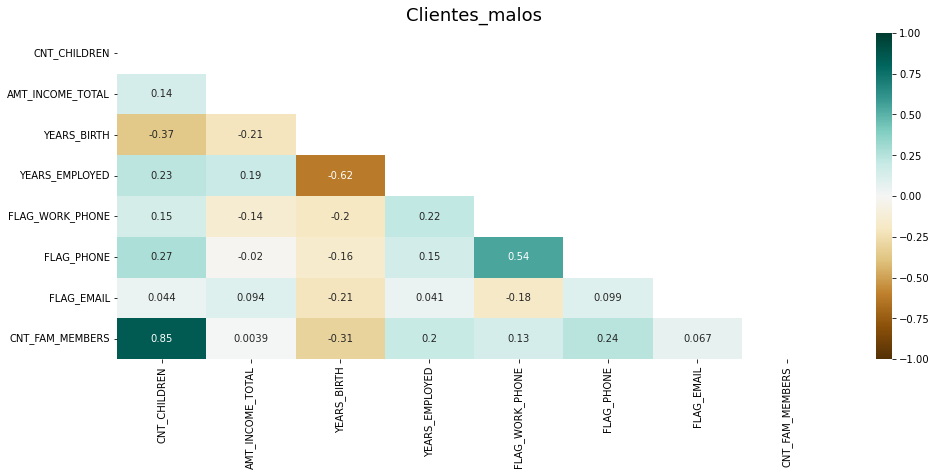

In [28]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_malos, dtype=np.bool))
heatmap = sns.heatmap(s_clientes_malos, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12);
plt.savefig('Clientes_malos.png', dpi=300, bbox_inches='tight')

pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Clientes_malos.png'
shutil.move(pos1,pos2)

/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_2202/1840547229.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(s_clientes_vip, dtype=np.bool))


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Clientes_VIP.png'

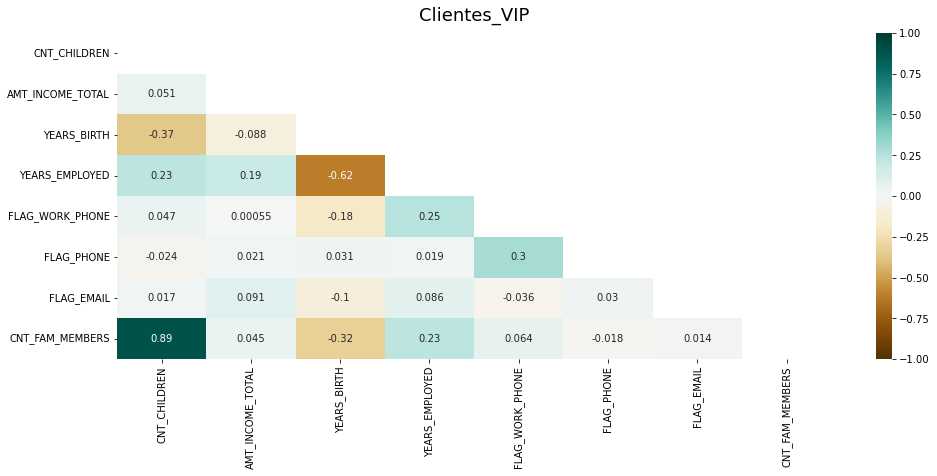

In [27]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_vip, dtype=np.bool))
heatmap = sns.heatmap(s_clientes_vip, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP', fontdict={'fontsize':18}, pad=12);
plt.savefig('Clientes_VIP.png', dpi=300, bbox_inches='tight')

pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Clientes_VIP.png'
shutil.move(pos1,pos2)

/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_2202/1464757102.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(s_clientes_regulares, dtype=np.bool))


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Clientes_regulares.png'

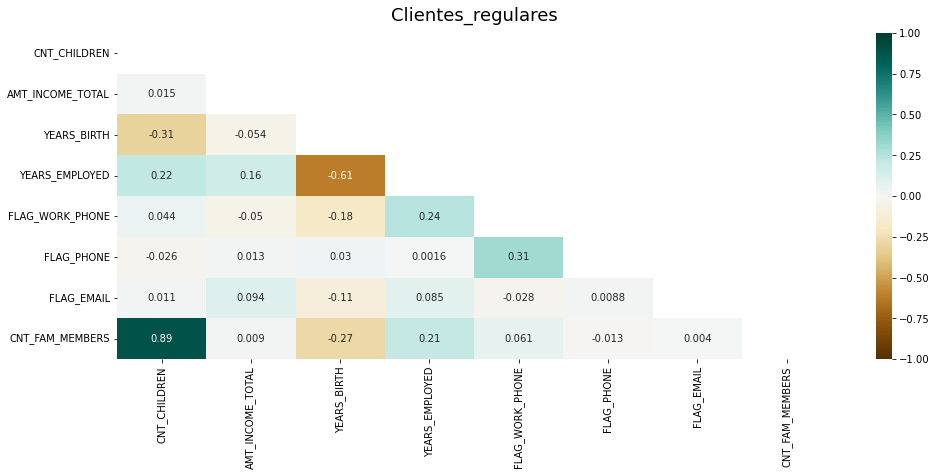

In [26]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_regulares, dtype=np.bool))
heatmap = sns.heatmap(s_clientes_regulares, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares', fontdict={'fontsize':18}, pad=12);
plt.savefig('Clientes_regulares.png', dpi=300, bbox_inches='tight')

pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Clientes_regulares.png'
shutil.move(pos1,pos2)


Text(0.5, 1.0, 'Correlación AMT_INCOME_TOTAL_VIP')

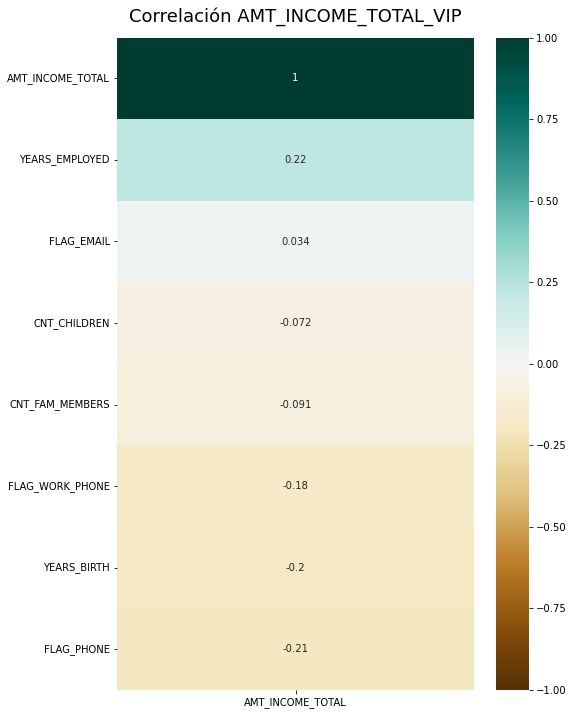

In [35]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_vip.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP', fontdict={'fontsize':18}, pad=16)

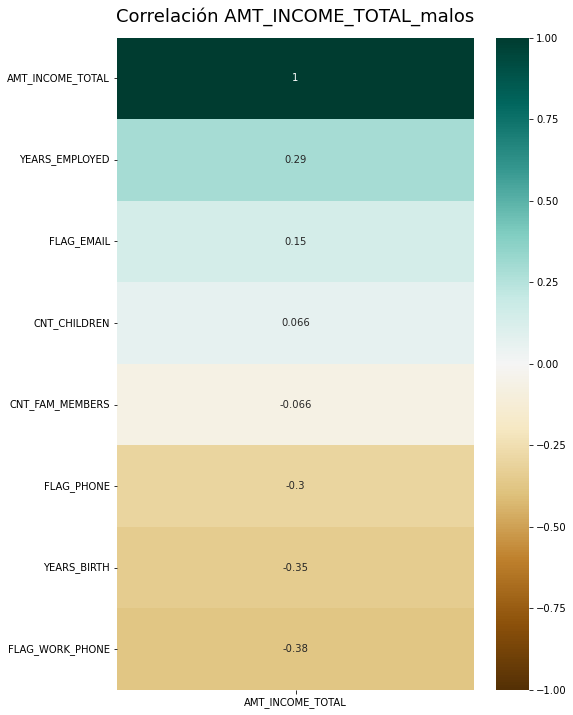

In [36]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_malos.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos', fontdict={'fontsize':18}, pad=16);
